# **STEP0 事前準備**

**コード8-1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **STEP1 データの用意**

**コード8-2 diabetes(糖尿病)のデータセットを読み込む**

In [2]:
from sklearn.datasets import load_diabetes
#diabetesのデータセットは糖尿病患者の検査結果を基に1年後の病気の進行状況を予測するためのデータセット
dm = load_diabetes(as_frame=True, scaled=False)

**コード8-3 dmの内容を調べる①**

In [3]:
dm

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

In [4]:
type(dm)

sklearn.utils._bunch.Bunch

**コード8-4 dmの内容を調べる②**

In [5]:
print(dm.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**コード8-5　正解値データを作成**

In [6]:
##target:1年後の糖尿病の進行度を数値として表したもの
y_dm = dm.target
y_dm.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [7]:
y_dm.shape

(442,)

In [8]:
type(y_dm)

pandas.core.series.Series

**コード8-6 y_dmの記述統計値を出力**

In [9]:
y_dm.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

**コード8-7 特徴量データの作成**

In [11]:
x_dm = dm.data
x_dm.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [12]:
x_dm.shape

(442, 10)

In [13]:
type(x_dm)

pandas.core.frame.DataFrame

**コード8-8 x_dmの記述統計値を出力**

In [14]:
x_dm.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


**コード8-9 x_dmからbmi列だけを抽出**

In [15]:
x_bmi=x_dm[['bmi']]
x_bmi

,bmi
0,32.1
1,21.6
2,30.5
3,25.3
4,23.0
...,...
437,28.2
438,24.9
439,24.9
440,30.0


**コード8-10 配列・データ型の確認**

In [16]:
x_bmi.shape

(442, 1)

In [17]:
type(x_bmi)

pandas.core.frame.DataFrame

In [21]:
x_bmi1=x_dm['bmi']
x_bmi1

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
       ... 
437    28.2
438    24.9
439    24.9
440    30.0
441    19.6
Name: bmi, Length: 442, dtype: float64

In [22]:
x_bmi1.shape

(442,)

In [23]:
type(x_bmi1)

pandas.core.series.Series

**コード8-11 正解値と特徴量で散布図を描出**

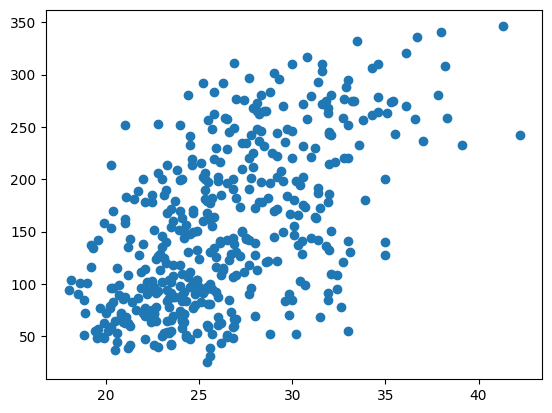

In [24]:
plt.scatter(x_bmi, y_dm)